Demo to test shifting a signal in the time and frequency domains

In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

In [49]:
def fdshift(sig,f0,df,nfp,tau):
    # Function to shift a complex spectrum by an  
    # amount such that its time domain counterpart 
    # (following IFT) is shifted by 'tau' 
    
    sigout=np.zeros(nfp,complex)
    for i in range(0,nfp):
        freq=f0+i*df
        exp_arg=2.*np.pi*freq*tau
        sigout[i]=sig[i]*np.e**(complex(0.,-exp_arg))
    return sigout


def Ricker(f0,t): 
    # Function to generate a Ricker wavelet
    import numpy as np
    return (1-2*(np.pi*f0*t)**2)*np.exp(-(np.pi*f0*t)**2)

500
3000
0.3333333333333333
715


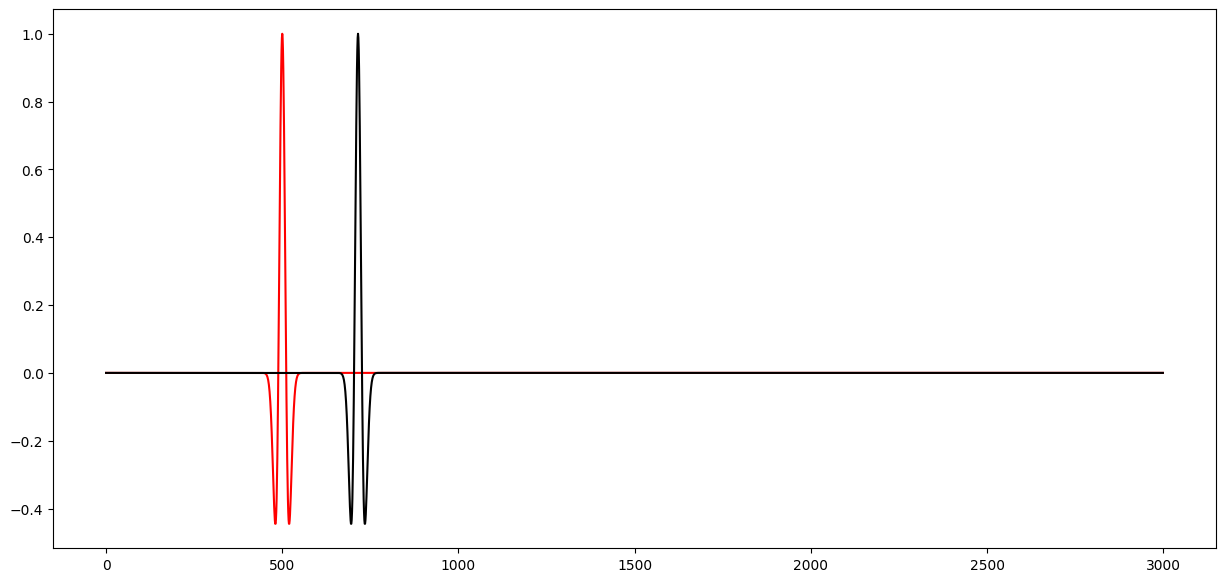

In [17]:

#set up signal params
frequency=20. # Dominant frequency of Ricker wavelet (in Hz)
Tmax=0.500 # Maximum time (in s)
dt=0.001 # Sampling period (in s)
t=np.arange(-Tmax,Tmax,dt) # Coordinate vector for time
t=np.pad(t,(0, t.size*2),mode='constant',constant_values=(4, 6))
#generate signal
wav=Ricker(frequency,t)
print (np.argmax(wav))
print (t.size)
plt.plot(wav,'r')
#plt.show()

#take FFT of original signal and shift in frequency domain
wavfft=np.fft.fft(wav)
n = wavfft.size
freq = np.fft.fftfreq(wavfft.size,d=dt)
df=1./(dt*t.size)
shift=0.215
shiftfft=fdshift(wavfft,0.,df,t.size,shift)
wavshift=np.fft.ifft(shiftfft)
print (df)

print (np.argmax(wavshift))
plt.plot(np.real(wavshift),'k-')
plt.show

sig1=wav
sig2=np.real(wavshift)

Shift specified: 0.215
Shift in #samples from xcorr: 215
dt: 0.001


<function matplotlib.pyplot.show(close=None, block=None)>

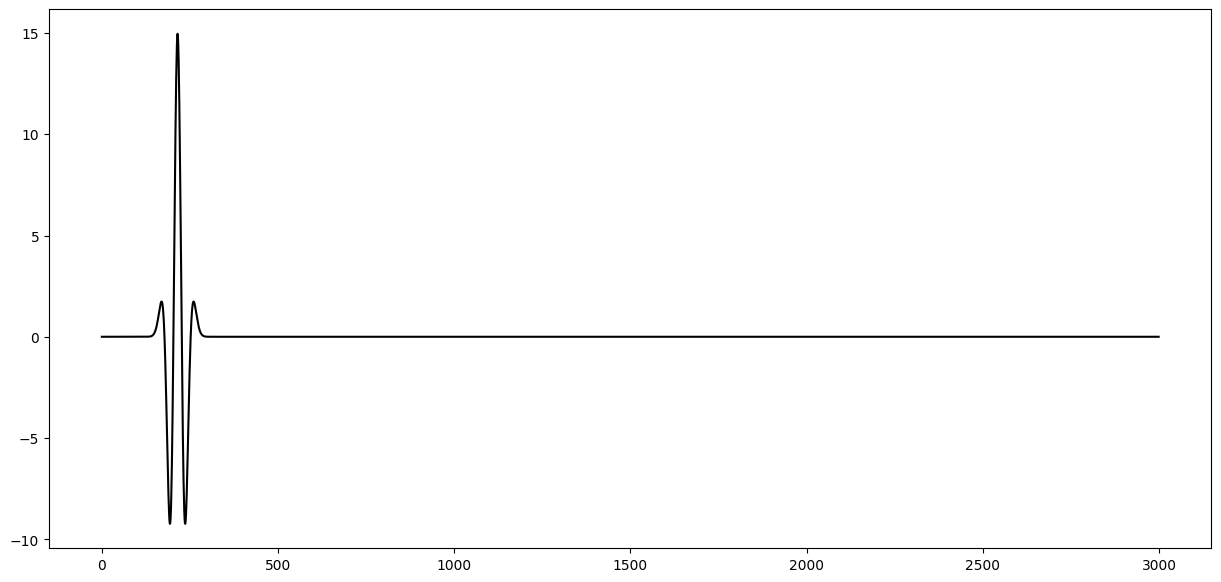

In [18]:
# Test xcorrelation in TD to check that argmax == time shift
xcorrtest=np.correlate(sig2,sig1,'full')
xcorrtest=xcorrtest[int(xcorrtest.size/2):]
print('Shift specified:', shift)
print('Shift in #samples from xcorr:', np.argmax(xcorrtest))
print('dt:', dt)

plt.plot(xcorrtest,'k')
plt.show

Shift specified: 0.215
Shift in #samples: 215


/home/mitchells/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


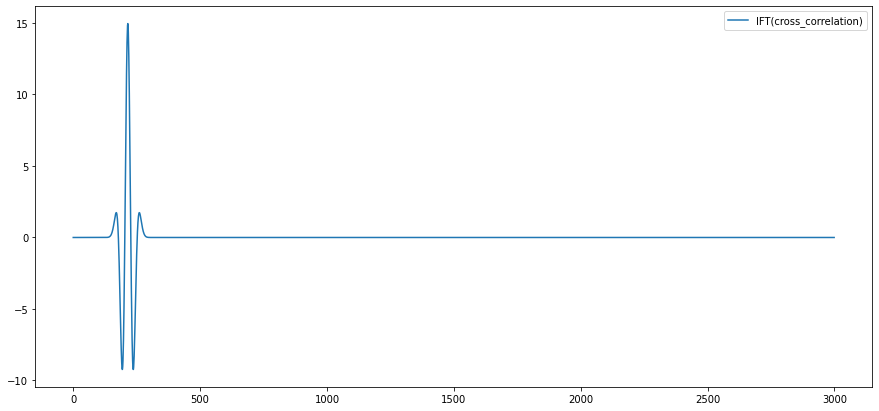

In [9]:
# Test xcorrelation in FD to check that argmax == time shift == xcorrelation in TD
xcorr=np.fft.ifft(shiftfft*np.conj(wavfft))#np.complex(sig1,sig1)*np.complex(np.conj(sig2),np.conj(sig2))
print('Shift specified:', shift)
print('Shift in #samples:', np.argmax(xcorr))

plt.plot(xcorr,label='IFT(cross_correlation)')
plt.legend()
plt.show()

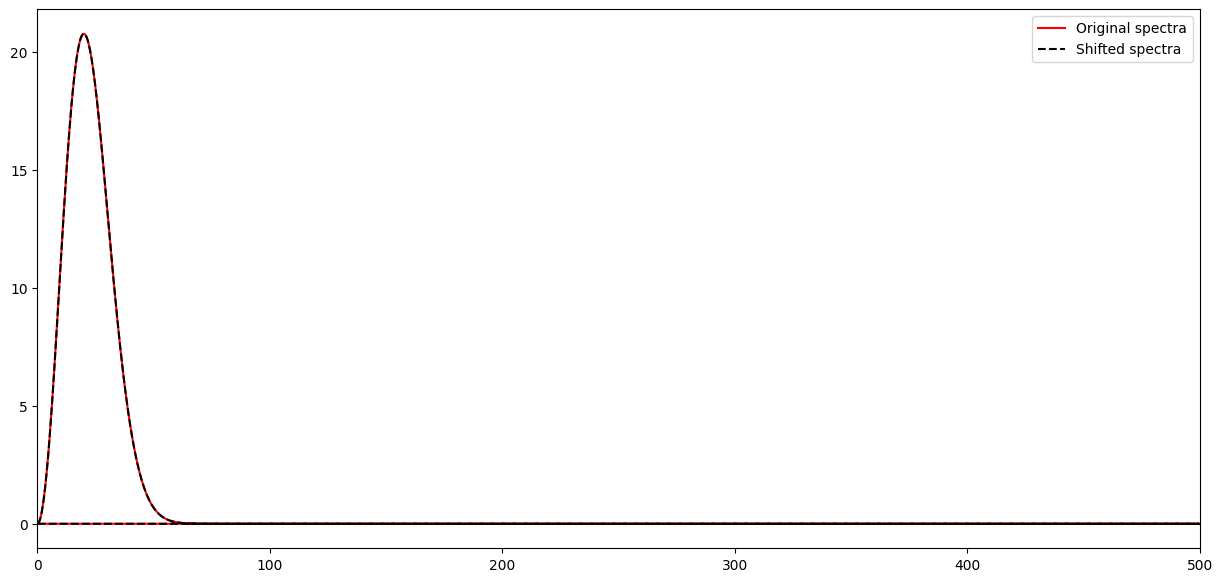

In [46]:
# Plot amplitude spectra of input and shifted signal (should be equal because a time shift is a change in phase)
plt.subplot(1,1,1)
plt.plot(freq[:int(n/2+1)],abs(wavfft[:int(n/2+1)]),label='Original spectra', color='red')

plt.plot(freq[:int(n/2+1)],abs(shiftfft[:int(n/2+1)]),label='Shifted spectra', color='black', linestyle = '--')
plt.xlim([0,1/dt/2]) # up to nyquist frequency
plt.legend()
plt.show()

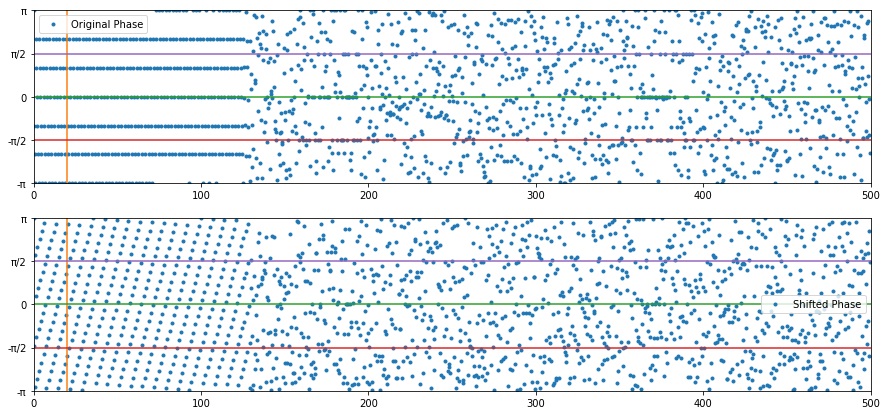

In [11]:
# Plot phase spectra of input and shifted signal 
# explanation on phase for frequencies other than the frequency of interest (20Hz)
# https://stackoverflow.com/questions/56543190/phase-spectrum-with-python-and-fft
# how to plot y axis in multiples of pi
#https://stackoverflow.com/questions/64553490/how-to-change-axes-labels-to-multiples-of-pi

plt.subplot(2,1,1)
phase=np.arctan2(np.imag(wavfft),np.real(wavfft))
#plt.plot((freq),phase,'r.',label='Original Phase')
plt.plot(freq[:int(n/2+1)],phase[:int(n/2+1)],'.',label='Original Phase')
plt.plot([frequency,frequency],[-np.pi,np.pi])
plt.plot([0,n/2],[0,0])
plt.plot([0,n/2],[-np.pi/2,-np.pi/2])
plt.plot([0,n/2],[np.pi/2,np.pi/2])
plt.xlim([0,1/dt/2]) # up to nyquist frequency
plt.ylim([-np.pi,np.pi])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/2, step=(np.pi/2)), ['-π','-π/2','0','π/2','π'])
plt.legend()

plt.subplot(2,1,2)
phase=np.arctan2(np.imag(shiftfft),np.real(shiftfft))
plt.plot(freq[:int(n/2+1)],phase[:int(n/2+1)],'.',label='Shifted Phase')
plt.plot([frequency,frequency],[-np.pi,np.pi])
plt.plot([0,n/2],[0,0])
plt.plot([0,n/2],[-np.pi/2,-np.pi/2])
plt.plot([0,n/2],[np.pi/2,np.pi/2])
plt.xlim([0,1/dt/2]) # up to nyquist frequency
plt.ylim([-np.pi,np.pi])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/2, step=(np.pi/2)), ['-π','-π/2','0','π/2','π'])
plt.legend()
plt.show()